# Parsing 'reports' from NVivo, all coders and with production version, and previous weeks, of codebook variants

version specifically to address issue of case numbers with new range of document names (PTR,CDOP etc)
and new code to extract whether CDOP or PTR in file names and create new column with flag


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import re
from string import printable
import ftfy
from scipy.stats import chi2_contingency


In [2]:
# widen display to allow long text strings to be more visible on screen
pd.set_option('display.max_colwidth',800)

In [3]:
%pwd

'\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\python_notebooks'

In [4]:
''' 
Get actual NVivo descriptions from codebook, generated for this specific set of codes.
Note that the codebook needs to saved in the xlsx format (not the default Word format)
'''
codebook_path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\Codebook - Leder Production - 26-02-2019.xlsx'
nvivo_codebook_df = pd.read_excel(codebook_path)

# get variable name from last part of hierarchical string, 
# need to also catch error of their being no '\' in name (i.e. when top-level node in hierarchy)
nvivo_codebook_df['variable_name'] = nvivo_codebook_df['Name'].apply(lambda y: y.rsplit('\\')[-1])

# strip digits from start of certain variable names
# these digist were added in NVivo to make hierarchy clearer to coders, but cannot be used in SPSS variables.
nvivo_codebook_df['variable_name'] = nvivo_codebook_df['variable_name'].apply(lambda x: x[2:] if x[0].isdigit() else x)
nvivo_codebook_df.head()

,Folder,Name,Description,variable_name
0,Nodes,1.Health,"Top level for codes related to the person's health, and healthcare",Health
1,Nodes,1.Health\Cancer,Codes for any death through cancer.,Cancer
2,Nodes,1.Health\Cancer\Cancer_date_referral,The date when the patient was referred to a specialist. Note to coders: just select the text with the full date for later post-processing.,Cancer_date_referral
3,Nodes,1.Health\Cancer\Cancer_date_symptoms_noticed,The date when symptoms were first noticed. Note to coders: just select the text with the full date for later post-processing.,Cancer_date_symptoms_noticed
4,Nodes,1.Health\Cancer\Cancer_date_symptoms_reported,The date when symptoms were first reported to a healthcare professional. Note to coders: just select the text with the full date for later post-processing.,Cancer_date_symptoms_reported


## Get NVivo data 

Note that NVivo report must be generated with 3 columns, in this order: Hierarchical Name, Coded Text, Name (of document = source)

In [5]:
# get idea of which NVivo rport files there are:
# there are variants of codes that evolved over the first few weeks, 

In [6]:
# data for week 1, 2018
nick_week_1_report_path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Week_1\\Nick_week_1_report_1.txt'
kamila_week_1_report_path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Week_1\\Kamila_week_1_report_1.txt'

# data for week 2
nick_week_2_report_path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Week_2\\Nick_week_2_report_1.txt'
kamila_week_2_report_path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Week_2\\kamila_week_2_report.txt'

# data for week 3
# noting from Nick for week 3, as rolled it over to following week
kamila_week_3_report_path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Week_3\\Kamila_week_3_report.txt'

# data for week 4
nick_week_4_report_path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Week_4\\nick_week_4_report.txt'
kamila_week_4_report_path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Week_4\\kamila_week_4_report.txt'

In [7]:
# data for production weeks

karen_production_report_project_1 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\karen_nvivo_report_1.txt'
karen_production_report_project_2 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\karen_nvivo_report_2.txt'


ann_production_report_project_1 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\ann_production_project_1_report.txt'
ann_production_report_project_2 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\ann_production_report_2.txt'
ann_production_report_project_3 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\ann_production_report_v3.txt'



# note - need to have nick un-updated files and rename below as the updated ones
nick_production_report_project_1 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\nick_production_updated_project_1_report.txt'
nick_production_report_project_2 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\nick_production_project_2_report.txt'
nick_production_report_project_3 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\nick_production_project_3_report.txt'
nick_production_report_project_4 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\nick_production_project_4_report.txt'


kamila_production_updated_project_1 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\kamila_production_updated_project_1_report.txt'
kamila_production_updated_project_2 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\kamila_production_updated_project_2_report.txt'

# original production version before the few updates made
nick_production_original_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\nick_production_original_report.txt'
kamila_production_original_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\kamila_production_original_report.txt'
ann_production_original_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\ann_production_original_report.txt'


In [8]:
# data for year 5 pilot codes

kamila_yr5_pilot_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Year_5_version\\pilot\\kamila_yr5_pilot_project_report.txt'
nick_yr5_pilot_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Year_5_version\\pilot\\nick_yr5_pilot_project_report.txt'

In [9]:
# data for year 5
nick_yr5_project_1_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Year_5_version\\nick_yr5_project_1_report.txt'
nick_yr5_project_2_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Year_5_version\\nick_yr5_project_2_report.txt'

kamila_yr5_project_1_report = '\\\\ads.bris.ac.uk\\folders\\Social Sciences and Law\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Kamila\\Coding_year_5\\kamila_Yr5_project_1_report.txt'

karen_yr5_project_1_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Year_5_version\\karen_yr5_project_1_report.txt'
karen_yr5_project_2_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Year_5_version\\karen_yr5_project_2_report.txt'

ann_yr5_project_1_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Year_5_version\\ann_yr5_project_1_report.txt'
ann_yr5_project_2_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Year_5_version\\ann_yr5_project_2_report.txt'

nicholasm_yr5_project_1_report = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\Year_5_version\\nicholasm_yr5_project_1_report.txt'


In [10]:
# data for special CDOP/PTR coding (now also has non CDOP files in the project)
ann_cdop_report_1 = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\ann_cdop1_report.txt'
ann_ptr_cdop_report =  '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\reviews_leder_revised_codes\\production_version\\ann_ptr_cdop_report.txt'

In [11]:
# code to try and deal with a set of NVivo report documents
# nvivo_filepaths_list = [nick_report_path,kamila_report_path,ann_report_path]

nvivo_filepaths_list = [nick_week_1_report_path,kamila_week_1_report_path,nick_week_2_report_path,\
                        kamila_week_2_report_path,kamila_week_3_report_path,nick_week_4_report_path,\
                        kamila_week_4_report_path,ann_production_report_project_1,nick_production_report_project_1,\
                       nick_production_report_project_2,kamila_production_updated_project_1,nick_production_original_report,\
                       kamila_production_original_report,ann_production_original_report,ann_production_report_project_2,\
                       karen_production_report_project_1,ann_cdop_report_1,ann_production_report_project_3,ann_ptr_cdop_report,\
                       nick_production_report_project_3,nick_production_report_project_4,kamila_production_updated_project_2,\
                       karen_production_report_project_2,nick_yr5_pilot_report,kamila_yr5_pilot_report,nick_yr5_project_1_report,\
                       kamila_yr5_project_1_report,karen_yr5_project_1_report,ann_yr5_project_1_report,ann_yr5_project_2_report,\
                       nick_yr5_project_2_report,nicholasm_yr5_project_1_report,karen_yr5_project_2_report]

In [12]:
def read_in_nvivo_report_as_df(a_report_path):
    ''' 
    Purpose: Convert a full report, which contains codings for many reviews, into a dataFrame 
    
    Parameters: The path to the report file generated by NVivo, as class:String
    
    Returns: A class:DataFrame seprating the three main columns of code/text/document.
    
    Comments: NaNs are replaced by empty strings
    '''
    nvivo_report_df = pd.read_fwf(a_report_path,skiprows=2,colspecs=[(0,26),(26,53),(53,80)],encoding='utf-8')
    # note: need to replace NaNs with '' here, otherwise problems removing not-needed lines later 
    nvivo_report_df = nvivo_report_df.fillna('')
    return(nvivo_report_df)

In [13]:
# function to clean aspects of the NVivo data
def clean_nvivo_input_df(a_report_df):
    '''
    Purpose: Take a raw class:DataFrame generated by read_in_nvivo_report_as_df
    
    Parameters: a class:DataFrame 
    
    Returns: a class:DataFrame which is a cleaned version of the input class:DataFrame
    
    Comments: NVivo expects the report to be printed and hence adds headers and footers on every 'page'. These need cleaning out.
            Certain characters are also replace by a blank character to avoid problem downstream.
    '''
    a_report_df_cleaned = a_report_df
    # remove rows that contain 'Hierarchical Name'=Reports\\, or the header of same name,  as being part of baggage generate by NVivo 
    # report generator for printing etc.
    a_report_df_cleaned = (a_report_df[a_report_df['Hierarchical Name'].str.contains('Reports')==False])
    # remove header rows for each new 'page' created by the pagination
    a_report_df_cleaned = a_report_df_cleaned[a_report_df_cleaned['Hierarchical Name'] !='Hierarchical Name' ]
    # remove  line starting with control character \x0c, used for 'form feed'.
    a_report_df_cleaned = a_report_df_cleaned[a_report_df_cleaned['Hierarchical Name'] !='\x0c']
    # remove lines where the review id is just a date-time (from pagination), picked up from the use of a colon in  the time
    a_report_df_cleaned = (a_report_df_cleaned[a_report_df_cleaned['Name'].str.contains('\:')==False])
    # drop last line (row) which is a black line
    a_report_df_cleaned = a_report_df_cleaned[:-1]
    
    # remove odd characters
    a_report_df_cleaned = a_report_df_cleaned.replace({'•':' '},regex=True)
    a_report_df_cleaned = a_report_df_cleaned.replace({'\t':' '},regex=True)
    
    
    
    return(a_report_df_cleaned)

In [14]:
# function to get elements from the raw nvivo df
def get_report_elements(a_report_df):
    ''' 
    Purpose: Separate the rows into a new dataframe 
    
    Parameters: a class:dataFrame generated by the function 'clean_nvivo_input_df'
    
    Returns: A class:DataFrame separating the three main columns of code/text/document.
    
    Comments: 
    '''
    node_names = ''.join(a_report_df['Hierarchical Name'].tolist())
    text_fragments = ' '.join(a_report_df['Coded Text'].tolist())
    case_ids = ''.join(a_report_df['Name'].tolist())
    
    row_number_of_separator = a_report_df['Hierarchical Name'].str.contains('──────').idxmax()
    separator_for_codes = a_report_df[row_number_of_separator:row_number_of_separator+1]['Hierarchical Name'].values[0]
    all_nodes = node_names.split(separator_for_codes)
    
    row_number_of_separator = a_report_df['Coded Text'].str.contains('──────').idxmax()
    separator_for_texts = a_report_df[row_number_of_separator:row_number_of_separator+1]['Coded Text'].values[0]
    all_text_fragments = text_fragments.split(separator_for_texts)

    row_number_of_separator = a_report_df['Name'].str.contains('──────').idxmax()
    separator_for_document_names = a_report_df[row_number_of_separator:row_number_of_separator+1]['Name'].values[0]
    all_document_names = case_ids.split(separator_for_document_names)

    report_data_df = pd.DataFrame({'variable_name_path':all_nodes,'review_number':all_document_names,'text_list':all_text_fragments})
    
   
    
    return(report_data_df)

In [15]:

def reduce_variable_name(a_report_df):
    ''' 
    Purpose: reduce the long version of the variable  names, as used by NVivo into he final form needed by SPSS
    
    Parameters: a class:dataFrame generated by the function 'get_report_elements'
    
    Returns: A class:DataFrame with variable names corrected
    
    Comments: Will also catch error of no '\' in name (i.e. top-level node in hierarchy in NVivo)
    '''
    a_report_df['variable_name'] = a_report_df['variable_name_path'].apply(lambda x: x.rsplit('\\',1)[1] if len(x) > 0 else '')
    # and drop column with full path-name
    a_report_df.drop(['variable_name_path'],axis=1,inplace=True)
    return(a_report_df)

In [16]:
def concat_page_spanning_texts(a_report_df):
    ''' 
    Purpose: remove any empty texts or codes caused by NVivo report being able to span two pages in print format
    
    Parameters: a class:dataFrame generated by the function 'reduce_variable_name'
    
    Returns: A class:DataFrame with empty cells deleted
    
    Comments: 
    '''
    for n in range(len(a_report_df)):
        if not a_report_df['variable_name'][n]:
            # print('empty cell at n= ',n)
            # if so I need to merge them with the row above
            text_to_concat_with = str(a_report_df[n:n+1].text_list.values)
            text_to_be_concated =  str(a_report_df[n-1:n].text_list.values)
            new_text = text_to_be_concated + text_to_concat_with
            # replace old text with new_text in first of these two rows
            a_report_df.iloc[n-1, a_report_df.columns.get_loc('text_list')] = new_text
            # and edit text in empty row left behind, for later removal (do not delete in loop as indices get confused)
            a_report_df.iloc[n, a_report_df.columns.get_loc('variable_name')] = 'DELETE'
    # now remove rows that have a DELETE as variable name
    a_report_df = a_report_df [a_report_df.variable_name != 'DELETE']
    return(a_report_df)

In [17]:
# function to remove leading digit in code variable name as this confuses SPSS (which does not permit digits as first chars in variable names)
def strip_leading_digits(a_report_df):
    ''' 
    Purpose: to remove any leading digits in short-form variable names
    
    Parameters: a class:dataFrame of NVivo data, after the variable long-forms have been reduced to the short form
    
    Returns: A class:DataFrame with empty cells deleted.
    
    Comments:  The leading digits are used in NVivo to order certain variables in the user interface
    '''
    a_report_df['variable_name'] = a_report_df['variable_name'].apply(lambda x:  x[2:] if x and x[0].isdigit() else x)
    return(a_report_df)

In [18]:
def get_case_ids(a_report_df):
    ''' 
    Purpose: Obtain a list of unique cases ID numbers from a dataframe of NVivo project reports
    
    Parameters: a class:dataFrame of NVivo data, after the variable long-forms have been reduced to the short form
    
    Returns: A class:List of unique case ID numbers
    
    Comments:  
    '''
    #get list of unique case identifiers (= type and number)
    case_ids = a_report_df.review_number.unique()
    #remove any empty strings
    case_ids = list(filter(None,unique_case_ids)) 
         
    unique_case_numbers = list(map(int,[re.findall('\d{8}', case_string)[0] for case_string in unique_case_ids]))
    return(unique_case_numbers)

In [19]:
# function to return full case file name
def get_case_file_names(a_report_df):
    ''' 
    Purpose: Obtain a list of unique casefile names (not just numbers) from a dataframe of NVivo project reports
    
    Parameters: a class:dataFrame of NVivo data, after the variable long-forms have been reduced to the short form
    
    Returns: A class:List of unique case filenames
    
    Comments:  
    '''
    #get list of unique case identifiers (= type and number)
    unique_case_ids = a_report_df.review_number.unique()
    #remove any empty strings
    unique_case_ids = list(filter(None,unique_case_ids))
    return(unique_case_ids)

In [20]:
def process_one_case(a_report_df,case_number):
    ''' 
    Purpose: Process a given case (defined by its number) as found in an NVivo report
    
    Parameters: a class:dataFrame of NVivo data, after the variable long-forms have been reduced to the short form
                a class:Integer, the ID number of the case
    
    Returns: A class:List of unique case ID numbers
    
    Comments:  
    '''
    a_case = a_report_df[a_report_df.review_number==case_number]
    # for any case ID, group comments for any variable together. There can be more than one, and these need to be assembled 
    # into a single field for later use. 
    a_case_grouped_df = a_case.groupby(by='variable_name')['text_list'].apply(list)
    # and reset index to 'flatten' columns names generated by grouping
    a_case_grouped_df = a_case_grouped_df.to_frame().reset_index()
    a_case_grouped_df

    # now need to concat all strings in the list to make a single string, with some break symbol (***) to show separate fragments
    new_strings=[]
    for n in range(len(a_case_grouped_df.text_list)):
        temp_str = '***'.join(a_case_grouped_df.text_list[n])
        new_strings.append(temp_str)


    # create new column with concatenated string for any given variable, after making new_strings a dataframe
    new_strings_df = pd.DataFrame(new_strings)
    new_strings_df.columns=(['support_text'])
    

    #add new columns to a_case_grouped_df
    a_case_extended_df = pd.concat([a_case_grouped_df,new_strings_df],axis=1)

    a_case_extended_df[['variable_name','support_text']]

    # add 'variable_value' column based on presence of text (set to 1 for now)
    # some may need specific setting to multiple option choices, as appropriate.
    a_case_extended_df['variable_value'] = 1

    # and drop the list of strings column, keeping the concatenated string columns for actual use later
    a_case_extended_df.drop(['text_list'],axis=1,inplace=True)

    # set column for variable_description using the description field from the NVivo codebook
    result = pd.merge(a_case_extended_df,nvivo_codebook_df,how='left',on=['variable_name'])
    # drop a couple of un-needed columns
    result.drop(['Name','Folder'],axis=1,inplace=True)
    # change all NaNs to zeros
    result.fillna(0,inplace=True)
    # # save as a csv file for SPSS
    output_path = '\\\\ads\\filestore\\Deaf_Studies\\Deaf\\nfrc\\LeDeR confidential\\Data Entry\\Avon\\junk\\'

    result.to_csv(output_path+'\\case_'+str(case_number)+'.csv')
    return(result)

In [21]:

def create_df_of_one_row(a_report_df,case_file_name):
    ''' 
    Purpose: To create df of one row in spss type format, by 'pivoting' the columns data from process_one_case into a row for each case_file_name
    
    Parameters: a class:dataFrame of NVivo data, after the variable long-forms have been reduced to the short form, and
                a class:String - the filename of the case review document
    
    Returns: A class:dataFrame for one case
    
    Comments:  Also adds a column to hold description of the type of case: Normal, CDOP or PTR, as these are treated differently downstream
    '''
    x = process_one_case(a_report_df,case_file_name)
    x[['variable_name','variable_value','support_text']]

    # create row for this previous case_file_name in spss type format
    # get list of variable in this case

    variables_used_list = list(x.variable_name)
    # create another set of variables for the suporting text
    # [s + mystring for s in mylist]
    variables_used_text_list = [s + '_atext' for s in variables_used_list]

    # interleave the variable names with variable names for supporting text
    zipped1 = list(itertools.chain(*zip(variables_used_list, variables_used_text_list)))
    # now interleave the values
    zipped2 = list(itertools.chain(*zip(list(x.variable_value), list(x.support_text))))

    # set these variable as the columns for a new row in the new df
    df =pd.DataFrame(columns=tuple(zipped1))
    # set values
    df.loc[0]= zipped2
    df['case_file_name_atext']=case_file_name
    # get case id number 
    case_nid_number = re.findall('\d{8}', case_file_name)

    df['N_ID'] = case_nid_number

        
    # create new column to hold data on type of document (be it IR, PTR etc)
    #print(case_file_name)
    if 'PTR' in case_file_name:
        df['case_file_type_atext']='PTR'
    elif 'CDOP' in case_file_name:
        df['case_file_type_atext']='CDOP'
    else:
        df['case_file_type_atext']='Normal'

    return(df)

In [22]:
def generate_final_df(a_report_df, unique_case_numbers):
    final_df = pd.DataFrame()
    for case in unique_case_numbers:
        a_df = create_df_of_one_row(a_report_df,case)
        final_df = pd.concat([final_df,a_df],axis=0)
    return(final_df)

# MAIN

In [23]:
%%time

reports_dict = {} # create a dictionary to hold key-values, where keys = names of the project reports
for a_report in nvivo_filepaths_list:
    # take a report generated by NVivo  from a 'project file' (nvp) and process it
    x = read_in_nvivo_report_as_df(a_report)
    x_clean = clean_nvivo_input_df(x)
    x_data_df = get_report_elements(x_clean)
    x_data_reduced_vars_df = reduce_variable_name(x_data_df)
    x_span_fixed_df = concat_page_spanning_texts(x_data_reduced_vars_df)
    # and remove leading digit as this confuses SPSS (which does not permit digits as first chars in variable names)
    x_strip_leading_digits_df = strip_leading_digits(x_span_fixed_df)
    
  
    # get all case filenames (and by extension the case N_IDs)
    case_file_names = get_case_file_names(x_strip_leading_digits_df)
    
    #final_df = generate_final_df(x_span_fixed_df,unique_case_numbers)
    final_df = generate_final_df(x_span_fixed_df,case_file_names)
    
    #convert NaNs to empty strings
    final_df = final_df.fillna('')
    final_df = final_df.reset_index(drop=True)
    # add column with coder name to df
    coder_name = a_report.split('\\')[-1:][0].split('_')[0].lower() # format of file name is codername_*
    final_df['coder_atext'] = coder_name
    # add report name name to df to assist in debugging SPSS issues
    final_df['report_atext'] = str(a_report.split('\\')[-1:][0])
    
    # rename column 'Reasonable_Adjustments' to 'Reasonable_adjustments', to be consistent with naming policy and with Yr5
    final_df.rename(columns={'Reasonable_Adjustments':'Reasonable_adjustments','Reasonable_Adjustments_atext':'Reasonable_adjustments_atext'}, inplace=True)
    
    # add report name and df to dictionary
    reports_dict[str(a_report.split('\\')[-1:][0])]=final_df
    


c:\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Wall time: 4min 31s


In [24]:
# concat these various dfs into one
dfs_list = [] 
for k,v in reports_dict.items():
    dfs_list.append(v)
    
len(dfs_list)

big_df = pd.concat(dfs_list,axis=0)


In [25]:
# change '' (empty string) to 0 for all non-text columns
# then change all NaN to 0 for non-text columns
flag_cols = [col for col in big_df.columns if '_atext' not in col]
big_df[flag_cols] = big_df[flag_cols].replace('',np.nan)
big_df[flag_cols] = big_df[flag_cols].fillna(0)

list(big_df.columns)

In [26]:
# count number of '1' values in each row (record) and add to new columns
# this gives a measure of the complexity of a case
big_df['number_codes'] = big_df.isin({1}).sum(1)

In [27]:
# go through all texts columns and replace non-printables
from string import printable
st = set(printable)

required_columns =  list(big_df.columns)
for var in required_columns:
    # get text columns only
    if var.endswith('_atext'):
        print(var)
        # remove non printables
        big_df[var] = big_df[var].apply(lambda x: x.encode('ascii',errors='ignore').decode('UTF-8') if isinstance(x,str) else x)


AAA_screening_atext
AAA_screening_no_atext
AAA_screening_yes_atext
AP_agencies_atext
AP_completed_DNACPR_atext
AP_completed_EOL_care_atext
AP_completed_LD_awareness_atext
AP_completed_MCA_atext
AP_completed_agencies_atext
AP_completed_care_coordination_atext
AP_completed_documentation_atext
AP_completed_family_atext
AP_completed_other_atext
AP_completed_reasonable_adjustments_atext
AP_completed_role_paid_carers_atext
AP_person_atext
AP_raised_DNACPR_atext
AP_raised_EOL_care_atext
AP_raised_LD_awareness_atext
AP_raised_MCA_atext
AP_raised_agencies_atext
AP_raised_care_coordination_atext
AP_raised_documentation_atext
AP_raised_family_atext
AP_raised_other_atext
AP_raised_reasonable_adjustments_atext
AP_raised_role_paid_carers_atext
Absences_1_to_4_per_month_atext
Absences_frequency_atext
Accident_incident_atext
Accommodation_atext
Accommodation_type_atext
Acm_Change_1Yr_Num_atext
Acm_Change_1Yr_one_atext
Acm_Change_1Yr_over_three_atext
Acm_Change_1Yr_three_atext
Acm_Change_1Yr_two_atext


Prof_care_home_carer_generic_atext
Prof_dietician_atext
Prof_direct_payment_brokers_atext
Prof_gastroenterologist_atext
Prof_gynaecologist_atext
Prof_neurologist_atext
Prof_nursing_home_carer_LD_atext
Prof_nursing_home_carer_generic_atext
Prof_occupational_therapist_LD_atext
Prof_occupational_therapist_atext
Prof_occupational_therapist_generic_atext
Prof_oncologist_atext
Prof_orthotist_podiatrist_atext
Prof_paediatrician_atext
Prof_physiotherapist_LD_atext
Prof_physiotherapist_atext
Prof_physiotherapist_generic_atext
Prof_podiatrist_atext
Prof_psychiatrist_LD_atext
Prof_psychiatrist_atext
Prof_psychiatrist_generic_atext
Prof_psychologist_LD_atext
Prof_psychologist_atext
Prof_psychologist_generic_atext
Prof_renal_specialist_atext
Prof_rheumatologist_atext
Prof_supported_living_carer_LD_atext
Prof_surgeon_atext
Prof_urologist_atext
Professional_IMCA_atext
Professional_health_medical_support_atext
Professional_health_nursing_support_atext
Professional_health_support_LD_services_atext
Prof

In [28]:
# save file for use in other python notebook (to generate SPSS files)
# using pickle to preserve data-types for each variable
big_df.to_pickle('master_nvivo_df.pickle')

In [29]:
big_df.shape

(1610, 1162)

In [30]:
len(big_df)

1610

(array([ 68., 109., 147., 260., 253., 215., 221., 130.,  89.,  60.,  33.,
         12.,  10.,   0.,   3.]),
 array([  1.        ,   8.33333333,  15.66666667,  23.        ,
         30.33333333,  37.66666667,  45.        ,  52.33333333,
         59.66666667,  67.        ,  74.33333333,  81.66666667,
         89.        ,  96.33333333, 103.66666667, 111.        ]),
 <a list of 15 Patch objects>)

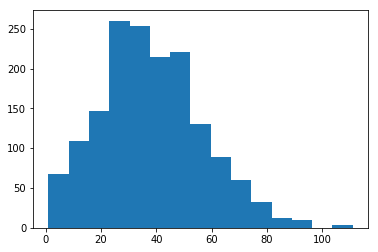

In [31]:
plt.hist(big_df.number_codes,bins=15)

In [33]:
import datetime
print('JOB COMPLETE AT: ',str(datetime.datetime.now()).split('.')[0])


JOB COMPLETE AT:  2019-07-04 10:32:58
